In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
%matplotlib inline
sns.set()

In [202]:
print(os.listdir('../FinalWork/berlin-airbnb-data'))

['reviews.csv', '.DS_Store', 'neighbourhoods.csv', 'listings.csv', 'calendar_summary.csv', 'reviews_summary.csv', '.ipynb_checkpoints', 'listings_summary.csv']


In [203]:
df_reviews = pd.read_csv('../FinalWork/berlin-airbnb-data/reviews.csv')
df_neighbourhoods = pd.read_csv('../FinalWork/berlin-airbnb-data/neighbourhoods.csv')
df_listings = pd.read_csv('../FinalWork/berlin-airbnb-data/listings.csv')
df_calendar_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/calendar_summary.csv')
df_reviews_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/reviews_summary.csv')
df_listings_summary = pd.read_csv('../FinalWork/berlin-airbnb-data/listings_summary.csv')

In [204]:
df_listings_summary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [205]:
# наличие удобств в квартире
df_listings_summary.amenities.head()

0    {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Famil...
1    {Wifi,Kitchen,Elevator,Heating,Washer,Essentia...
2    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
3    {Internet,Wifi,"Pets allowed","Pets live on th...
4    {Wifi,Heating,"Family/kid friendly",Essentials...
Name: amenities, dtype: object

In [206]:
# список наименований удобств для дальнейшего выбора важных. Удаление лишних символов
s2 = '":@.-()/{}'
for row in df_listings_summary.amenities:
    s1 = row
    for sim in s2:
        s1 = s1.replace(str(sim), '')
    R = s1.split(",")
    print (R)

['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Gym', 'Heating', 'Familykid friendly', 'Smoke detector', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Private living room', 'Bathtub', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Stove', 'Luggage dropoff allowed', 'Long term stays allowed']
['Wifi', 'Kitchen', 'Elevator', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hair dryer', 'Laptop friendly workspace', 'Private living room']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'Shampoo', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['Internet', 'Wifi', 'Pets allowed', 'Pets live on this property', 'Cats', 'Free street

['TV', 'Internet', 'Wifi', 'Paid parking off premises', 'Elevator', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'Hangers', 'translation missing enhosting_amenity_50', 'Self checkin', 'Building staff', 'Hot water']
['TV', 'Internet', 'Wifi', 'Paid parking off premises', 'Elevator', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'translation missing enhosting_amenity_50', 'Self checkin', 'Building staff', 'Hot water']
['TV', 'Internet', 'Wifi', 'Paid parking off premises', 'Elevator', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Smoke detector', 'First aid kit', 'Safety card', 'Fire extinguisher', 'Essentials', 'Hangers', 'translation missing enhosting_amenity_50', 'Self checkin', 'Building staff', 'Hot water']
['TV', 'Internet', 'Wifi', 'Kitchen', 'Elevator', 'Heating', 'Familykid friendly', 'Washer

['Internet', 'Wifi', 'Kitchen', 'Free parking on premises', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Hair dryer', 'Laptop friendly workspace', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50', 'Self checkin', 'Building staff', 'Hot water', 'Bed linens']
['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Heating', 'Washer', 'Dryer', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Bed linens', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Wheelchair accessible', 'Kitchen', 'Elevator', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Smoke detector', 'First aid kit', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Smoking allowed', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 

['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Washer']
['TV', 'Cable TV', 'Kitchen', 'Heating', 'Washer']
['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Doorman', 'Pets live on this property', 'Dogs', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Hair dryer', 'Baby monitor', 'Outlet covers', 'Bathtub', 'Baby bath', 'Changing table', 'High chair', 'Children’s books and toys', 'Crib', 'Roomdarkening shades', 'Children’s dinnerware', 'Hot water', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Luggage dropoff allowed']
['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Lock on bedroom door', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Bed linens', 'Extra pillows and blankets', 'Microwave', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware',

['TV', 'Internet', 'Wifi', 'Kitchen', 'Elevator', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Host greets you']
['TV', 'Wifi', 'Kitchen', 'Smoking allowed', 'Pets allowed', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'First aid kit', 'Safety card', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials', 'Host greets you']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials']
['Internet', 'Wifi', 'Kitchen', 'Heating', 'Familykid friendly', 'Washer', 'Essentials']
['TV', 'Wifi', 'Kitchen', 'Smoking allowed', 'Heating', 'Washer', 'Dryer', 'Essentials', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Host greets you']
['TV', 'Internet', '

['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Essentials', '24hour checkin', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_amenity_50', 'Bathtub', 'Roomdarkening shades', 'Hot water', 'Host greets you']
['Internet', 'Wifi', 'Kitchen', 'Pets allowed', 'Elevator', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Safety card', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Bathtub', 'Changing table', 'High chair', 'Children’s books and toys', 'Babysitter recommendations', 'Children’s dinnerware', 'Coffee maker', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Patio or balcony', 'Garden or backyard', 'Luggage dropoff allowed']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials']
['TV', 'Internet', 'Wifi', 'Kitchen', 'Heating',

['Internet', 'Wifi', 'Kitchen', 'Elevator', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials', 'Laptop friendly workspace', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50', 'Private living room', 'Bathtub', 'Baby bath', 'High chair', 'Crib', 'Refrigerator', 'Cooking basics', 'Patio or balcony']
['Internet', 'Wifi', 'Kitchen', 'Smoking allowed', 'Pets allowed', 'Pets live on this property', 'Dogs', 'Free street parking', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Essentials', 'Hangers', 'Hair dryer', 'Laptop friendly workspace', 'Baby monitor', 'Bathtub', 'Changing table', 'High chair', 'Children’s books and toys', 'Crib', 'Pack ’n Playtravel crib', 'Roomdarkening shades', 'Children’s dinnerware', 'Dishwasher', 'Cooking basics', 'Oven', 'Stove', 'Patio or balcony', 'Host greets you']
['Internet', 'Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Familykid friendly', 'Washer', 'Dryer', 'Shampoo

['Wifi', 'Wheelchair accessible', 'Kitchen', 'Paid parking off premises', 'Smoking allowed', 'Elevator', 'Free street parking', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Bed linens', 'Luggage dropoff allowed', 'Host greets you']
['Internet', 'Wifi', 'Wheelchair accessible', 'Kitchen', 'Paid parking off premises', 'Smoking allowed', 'Pets live on this property', 'Dogs', 'Elevator', 'Free street parking', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Carbon monoxide detector', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50', 'Hot water', 'Host greets you']
['TV', 'Wifi', 'Kitchen', 'Smoking allowed', 'Elevator', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'translation missing enhosting_ame

['TV', 'Cable TV', 'Internet', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Familykid friendly', 'Washer', 'Smoke detector', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'High chair', 'Pack ’n Playtravel crib', 'Hot water', 'Bed linens', 'Luggage dropoff allowed', 'Long term stays allowed', 'Host greets you']
['Wifi', 'Kitchen', 'Buzzerwireless intercom', 'Heating', 'Essentials', 'Shampoo', 'Hangers', 'Hair dryer', 'Laptop friendly workspace', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50']
['Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Washer', 'First aid kit', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hair dryer', 'translation missing enhosting_amenity_49', 'translation missing enhosting_amenity_50', 'Bathtub', 'Hot water', 'Bed linens', 'Pocket wifi', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Garden or backyard', 'Luggage 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['Wifi', 'Kitchen', 'Heating', 'Washer', 'Safety card', 'Essentials', 'Shampoo', 'Hangers', 'Iron', 'Laptop friendly workspace']
['TV', 'Wifi', 'Kitchen', 'Smoking allowed', 'Breakfast', 'Free street parking', 'Heating', 'Essentials', 'Shampoo', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Host greets you']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Private living room', 'Host greets you']
['TV', 'Wifi', 'Kitchen', 'Free parking on premises', 'Breakfast', 'Elevator', 'Heating', 'Washer', 'Dryer', 'Essentials', 'Shampoo', 'Laptop friendly workspace', 'Other']
['Wifi', 'Kitchen', 'Paid parking off premises', 'Buzzerwireless intercom', 'Heating', 'Washer', 'Essentials', 'Shampoo', 'Laptop friendly workspace', 'Hot water', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Patio or balcony', 'Host greets you']
['Wifi', 'Kitchen', 'Heating', 'Suitable for events', 'Washer', 'Dryer', 'Essentials'

['Wifi', 'Host greets you']
['Wifi', 'Kitchen', 'Elevator', 'Heating', 'Washer', 'Essentials', 'Bathtub', 'Roomdarkening shades', 'Hot water', 'Bed linens', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Luggage dropoff allowed', 'Host greets you']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Bathtub', 'Hot water', 'Bed linens', 'Refrigerator', 'Dishwasher', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'Patio or balcony', 'Luggage dropoff allowed']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Smoke detector', 'Essentials', 'Hair dryer', 'Laptop friendly workspace', 'Hot water']
['Wifi', 'Kitchen', 'Free parking on premises', 'Heating', 'Washer', 'Dryer', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers']
['TV', 'Wifi', 'Kitchen', 'Free street parking', 'Heating', 'Washer', 'Essentials', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Hot water', 'Lo

['TV', 'Wifi', 'Air conditioning', 'Kitchen', 'Free parking on premises', 'Smoking allowed', 'Pets allowed', 'Elevator', 'Hot tub', 'Indoor fireplace', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['TV', 'Wifi', 'Air conditioning', 'Kitchen', 'Free parking on premises', 'Pets allowed', 'Elevator', 'Hot tub', 'Indoor fireplace', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Dryer', 'Essentials', 'Hangers', 'Laptop friendly workspace', 'Hot water']
['Wifi', 'Kitchen', 'Heating', 'Washer', 'Smoke detector', 'Carbon monoxide detector', 'Essentials', 'Shampoo', 'Laptop friendly workspace']
['TV', 'Wifi', 'Kitchen', 'Free street parking', 'Hot tub', 'He

In [244]:
# в значениях стоимости присутствует знак $ нужно будет его удалить
df_listings_summary.price.head()

0    60.00
1    17.00
2    90.00
3    26.00
4    42.00
Name: price, dtype: object

In [208]:
# обработка пропущенных значений стоимости
df_listings_summary["security_deposit"].fillna("$0.00", inplace=True)
df_listings_summary["cleaning_fee"].fillna("$0.00", inplace=True)
df_listings_summary["extra_people"].fillna("$0.00", inplace=True)

In [209]:
# удаляем символ $ из значений стоимости
def remove_s(str_price):
    if "," in str_price:
        str_price = str_price.replace(",", "")
    else:
        pass
    return str_price[1:]


for s_column in ["price", "security_deposit", "cleaning_fee", "extra_people"]:
    price_no_s = df_listings_summary[s_column].apply(remove_s)
    df_listings_summary[s_column] = price_no_s

In [247]:
df_listings_summary["price"] = df_listings_summary["price"].astype("float")

In [248]:
df_listings_summary["price"].head()

0    60.0
1    17.0
2    90.0
3    26.0
4    42.0
Name: price, dtype: float64

In [249]:
df_listings_summary.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [250]:
# Заполняем пропущенные значения
df_listings_summary["host_is_superhost"].fillna("f", inplace=True)
df_listings_summary["host_is_superhost"].isna().any()

False

In [251]:
# Заполняем пропущенные значения
df_listings_summary["host_identity_verified"].fillna("f", inplace=True)
df_listings_summary["host_identity_verified"].isna().any()

False

In [252]:
# Заполняем пропущенные значения
df_listings_summary["bedrooms"].fillna(1.0, inplace=True)
df_listings_summary["bedrooms"].isna().any()

False

In [253]:
# Выбираем нужные колонки
columns_to_keep = ["id", "neighbourhood_cleansed", "neighbourhood_group_cleansed",
                   "property_type", "room_type", "accommodates", "bedrooms", "bed_type",
                   "amenities", "price", "security_deposit", "cleaning_fee", "guests_included", 
                   "extra_people", "minimum_nights", "instant_bookable", "cancellation_policy",
                   "host_identity_verified", "is_business_travel_ready", "host_is_superhost", "latitude", "longitude"]

In [254]:
df_listings_summary_selected = df_listings_summary[columns_to_keep] 
df_listings_summary_selected.head()

,id,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bedrooms,bed_type,amenities,price,...,guests_included,extra_people,minimum_nights,instant_bookable,cancellation_policy,host_identity_verified,is_business_travel_ready,host_is_superhost,latitude,longitude
0,2015,Brunnenstr. Süd,Mitte,Guesthouse,Entire home/apt,3,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60.0,...,1,28.00,4,f,strict_14_with_grace_period,t,f,t,52.534537,13.402557
1,2695,Prenzlauer Berg Nordwest,Pankow,Apartment,Private room,2,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,...,1,0.00,2,f,flexible,t,f,f,52.548513,13.404553
2,3176,Prenzlauer Berg Südwest,Pankow,Apartment,Entire home/apt,4,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,...,2,20.00,62,t,strict_14_with_grace_period,t,f,f,52.534996,13.417579
3,3309,Schöneberg-Nord,Tempelhof - Schöneberg,Apartment,Private room,2,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",26.0,...,1,18.00,5,f,strict_14_with_grace_period,t,f,f,52.498855,13.349065
4,7071,Helmholtzplatz,Pankow,Apartment,Private room,2,1.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",42.0,...,1,24.00,2,f,moderate,t,f,t,52.543157,13.415091


In [255]:
# Проверяем наличие пропущенных значений
df_listings_summary_selected.isna().sum()

id                              0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
property_type                   0
room_type                       0
accommodates                    0
bedrooms                        0
bed_type                        0
amenities                       0
price                           0
security_deposit                0
cleaning_fee                    0
guests_included                 0
extra_people                    0
minimum_nights                  0
instant_bookable                0
cancellation_policy             0
host_identity_verified          0
is_business_travel_ready        0
host_is_superhost               0
latitude                        0
longitude                       0
dtype: int64

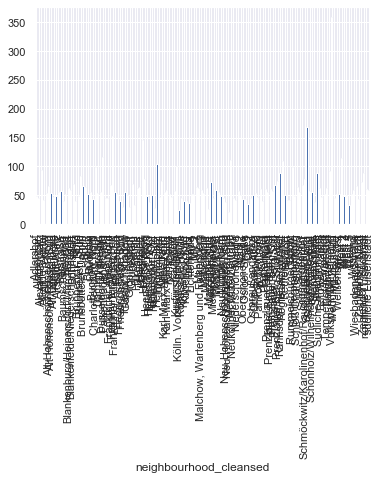

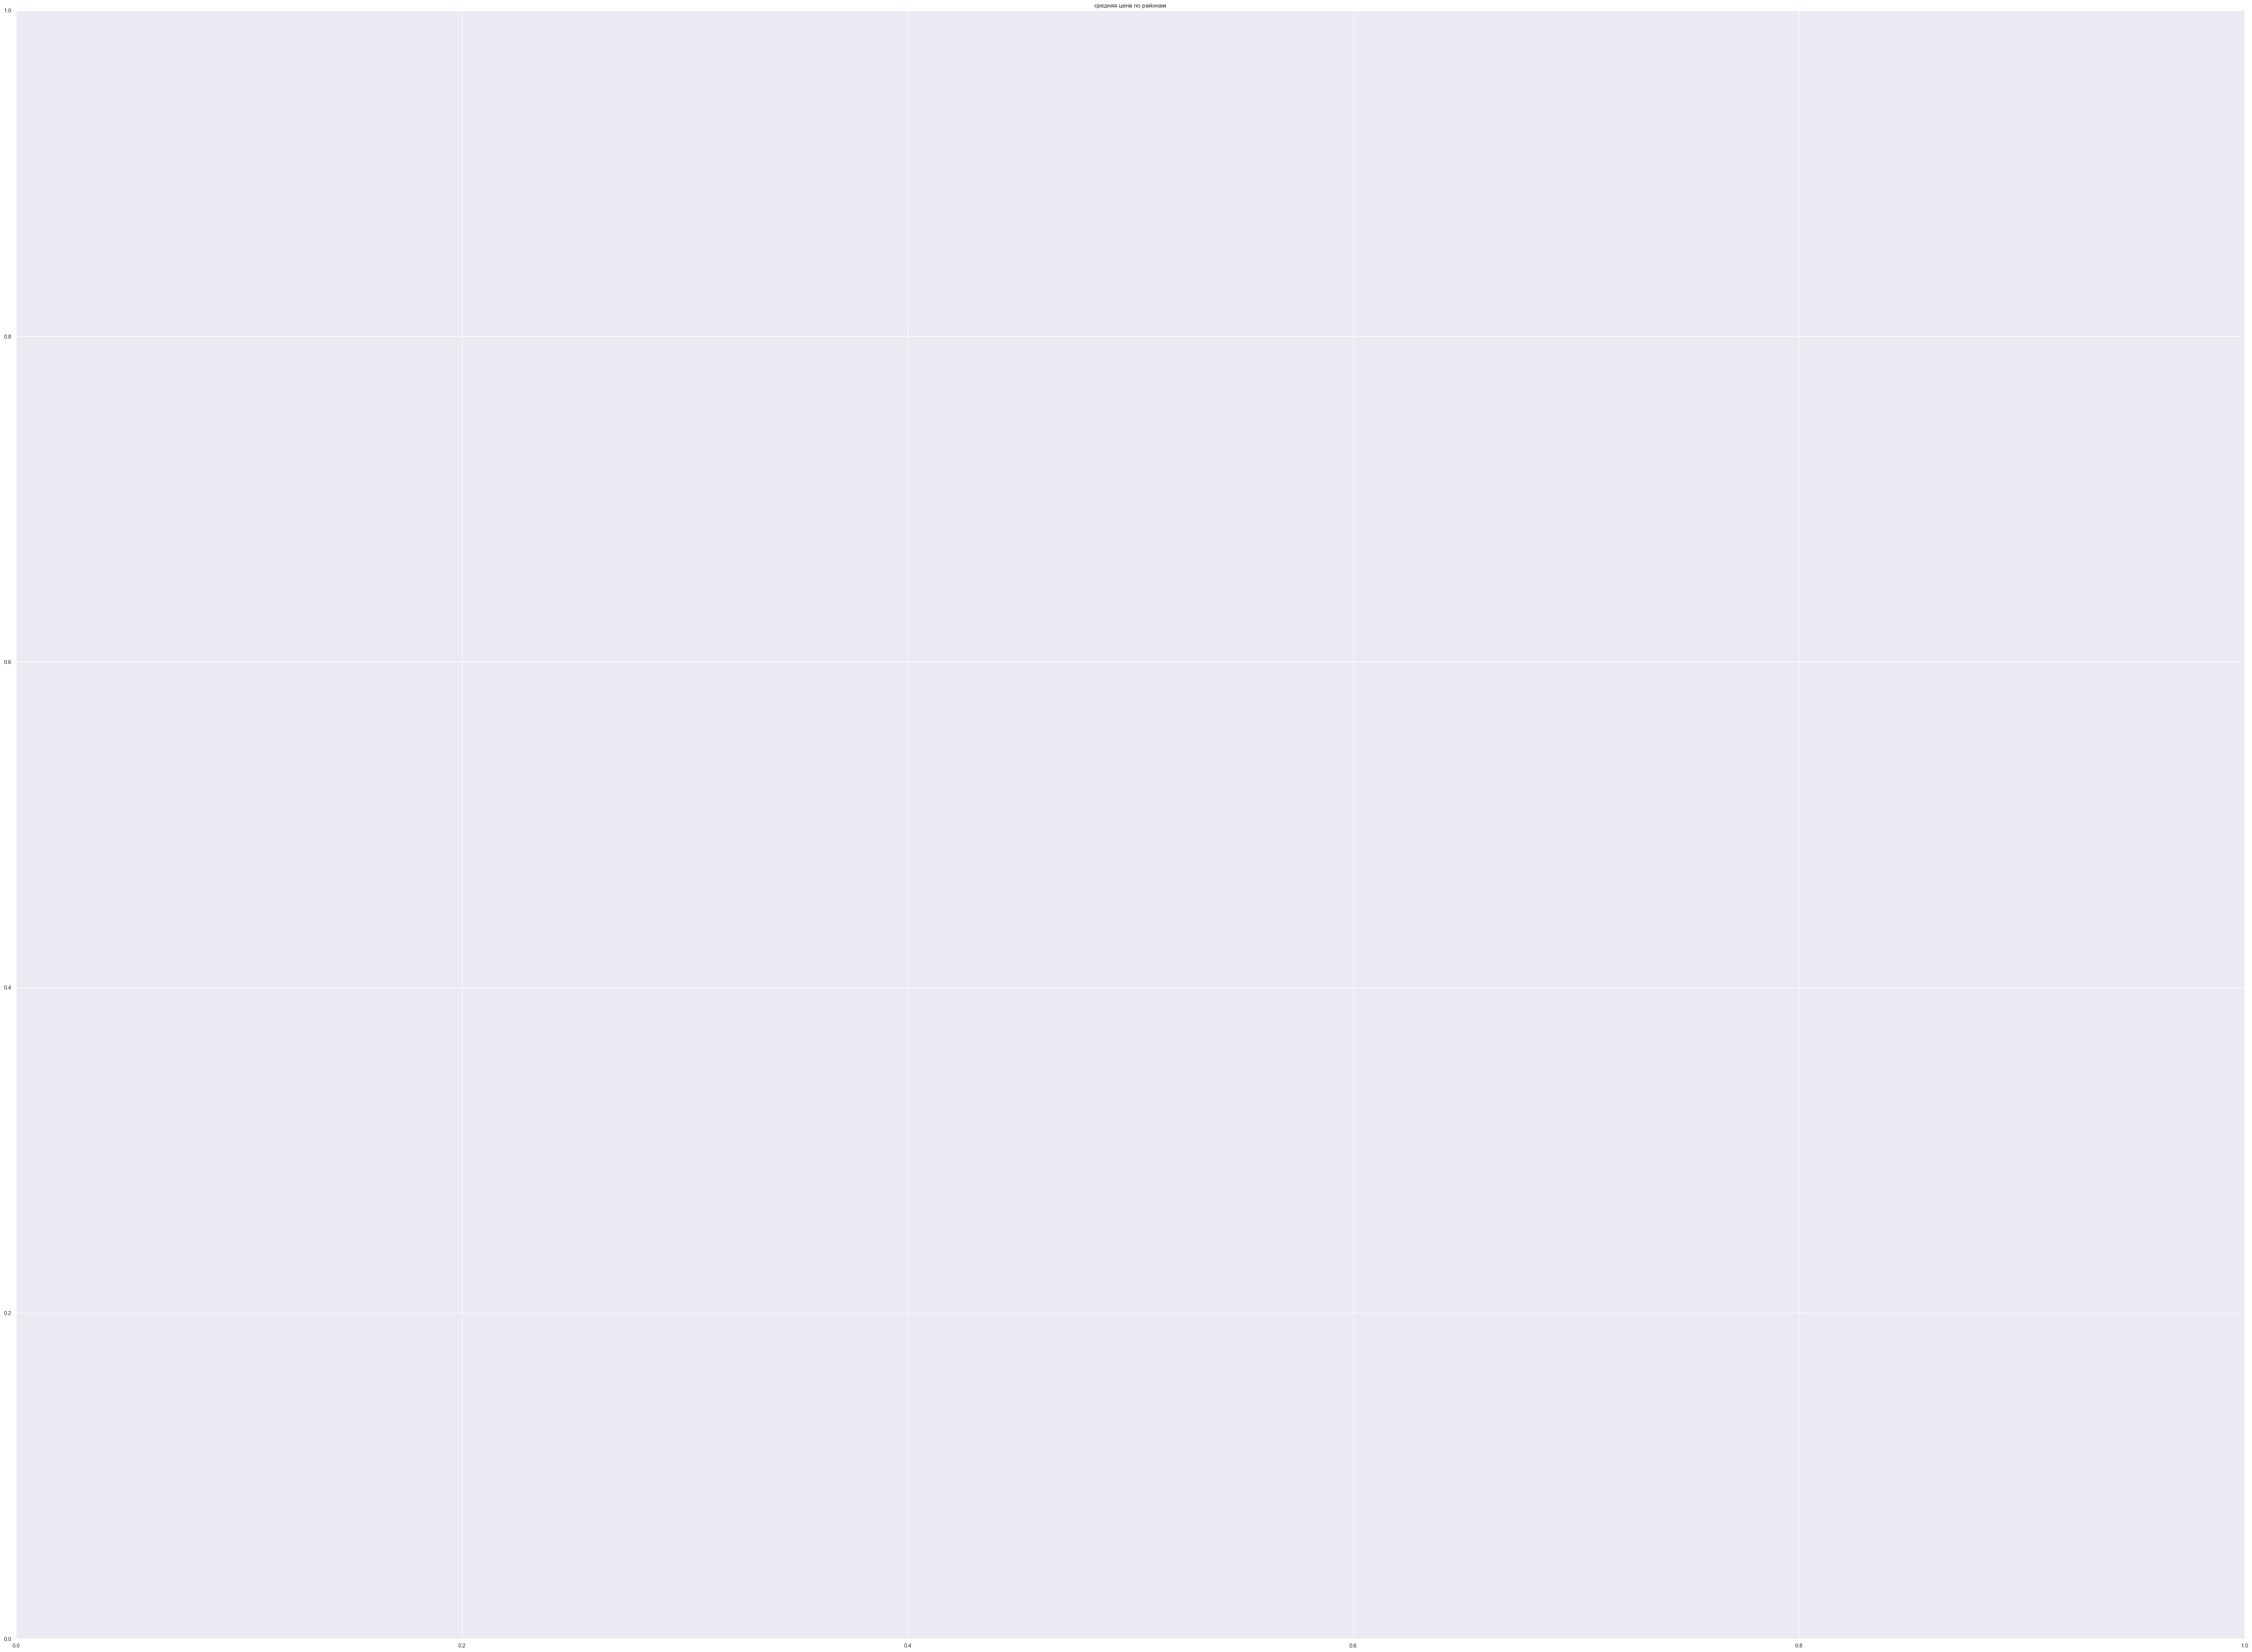

In [305]:
# влияние переменных на цену
avg_price_host = df_listings_summary_selected.groupby("neighbourhood_cleansed").mean()["price"]
avg_price_host.plot(kind="bar")
plt.figure(figsize=(80, 60)) # не получается увеличить
plt.title("средняя ценв по районам")
plt.show()

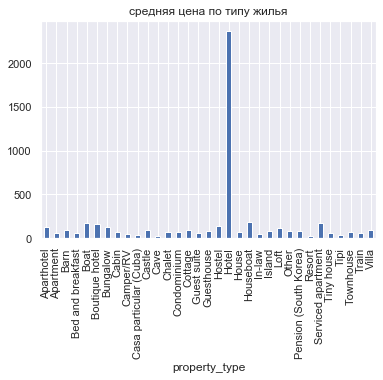

In [311]:
avg_price_host = df_listings_summary_selected.groupby("property_type").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу жилья")
plt.show()

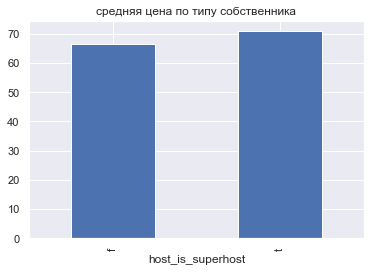

In [307]:
avg_price_host = df_listings_summary_selected.groupby("host_is_superhost").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу собственника")
plt.show()

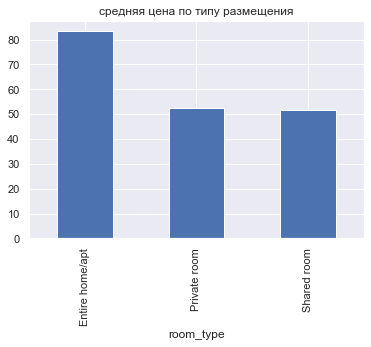

In [308]:
# здесь видно, что влияет на цену только один тип размещения. Целесообразно сделать одну колонку
avg_price_host = df_listings_summary_selected.groupby("room_type").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу размещения")
plt.show()

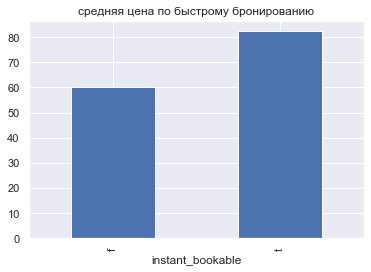

In [310]:
avg_price_host = df_listings_summary_selected.groupby("instant_bookable").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по быстрому бронированию")
plt.show()

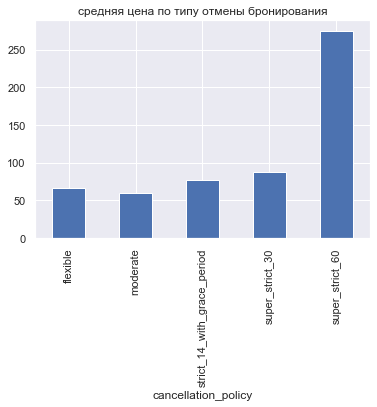

In [313]:
avg_price_host = df_listings_summary_selected.groupby("cancellation_policy").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу отмены бронирования")
plt.show()

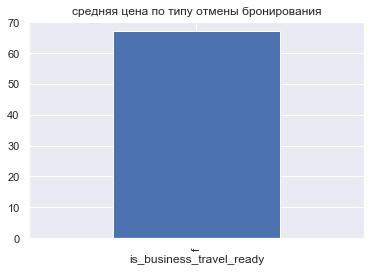

In [315]:
# эта колонка не влияет на цену
avg_price_host = df_listings_summary_selected.groupby("is_business_travel_ready").mean()["price"]
avg_price_host.plot(kind="bar")
plt.title("средняя цена по типу отмены бронирования")
plt.show()

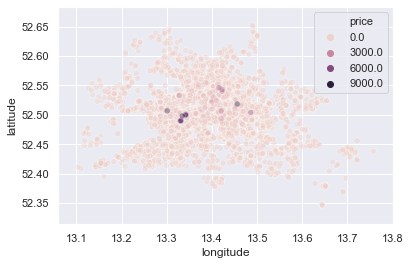

In [316]:
geo = df_listings_summary_selected[['latitude', 'longitude', 'price']]
geo = geo.sort_values("price", ascending=True)  
geo.describe()
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="price", 
                data=geo, 
                alpha=0.4)

In [ ]:
# дальнейшие действия: нужно найти выбросы данных цен, создать новые колонки по наличию/отсутствию услуг или удобств,
# рассчитать удаленность от центра